Name: Zhuoyuan Xu (Kallen)

NetID: zx1137

**Problem 1**

(a) Given the signal $$z[j]=x[j]cos(\frac{2\pi C_1j}{N})+y[j]cos(\frac{2\pi C_2j}{N})$$

By corollary 1.3, $$\hat{z}[k]=\frac{\hat{x}[k-C_1]+\hat{x}[k+C_1]}{2}+\frac{\hat{y}[k-C_2]+\hat{y}[k+C_2]}{2}$$

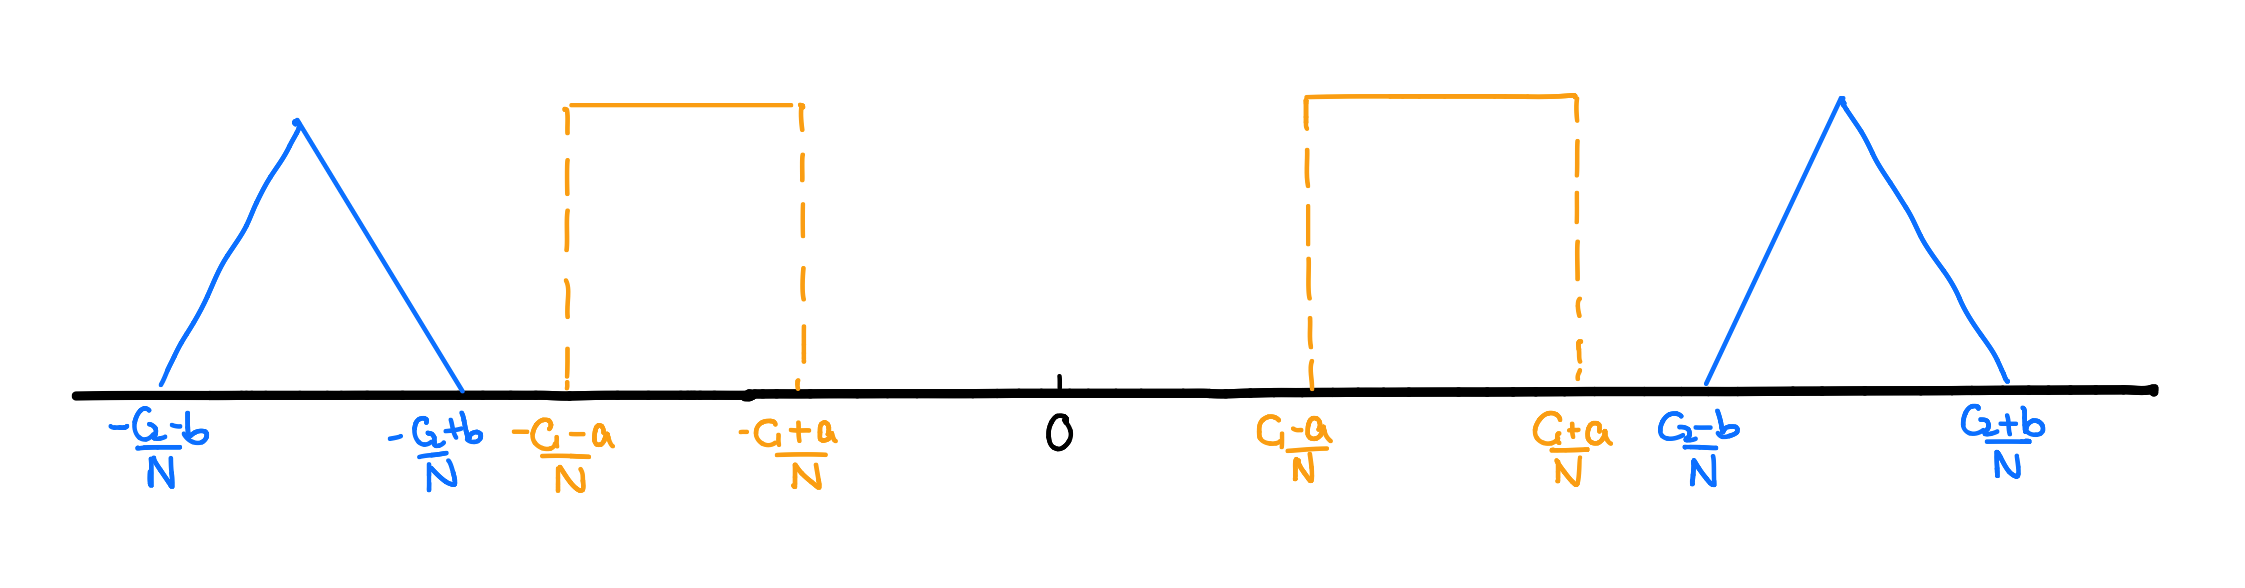

In [114]:
from IPython.display import Image
Image(filename='Problem1a.png')

(b) The signal z is multiplied by a sinusoid $\sigma$ of frequency $\frac{R}{N}$ to obtain signal w.
$$\sigma[j]=2cos(\frac{2\pi Rj}{N})$$
The w can be written as 
$$w[j]=2z[j]cos(\frac{2\pi Rj}{N})=2x[j]cos(\frac{2\pi C_1j}{N})cos(\frac{2\pi Rj}{N})+2y[j]cos(\frac{2\pi C_2j}{N})cos(\frac{2\pi Rj}{N})$$

Then DFT can be written as 
$$\begin{split}\hat{w}[k]&=\hat{z}[k-R]+\hat{z}[k+R]\\
&=\frac{\hat{x}[k-R-C_1]+\hat{x}[k-R+C_1]}{2}+\frac{\hat{y}[k-R-C_2]+\hat{y}[k-R+C_2]}{2}\\&+\frac{\hat{x}[k+R-C_1]+\hat{x}[k+R+C_1]}{2}+\frac{\hat{y}[k+R-C_2]+\hat{y}[k+R+C_2]}{2}\end{split}$$

In order to have the final signal $s=x$, we should have some "blocks" of DFT coefficients shifted back to have a center at 0 and magnitude equal to the original DFT of x. Then after applying the low pass filter, we only keep the DFT coefficients center at 0 and filter out the rest of the coefficients.

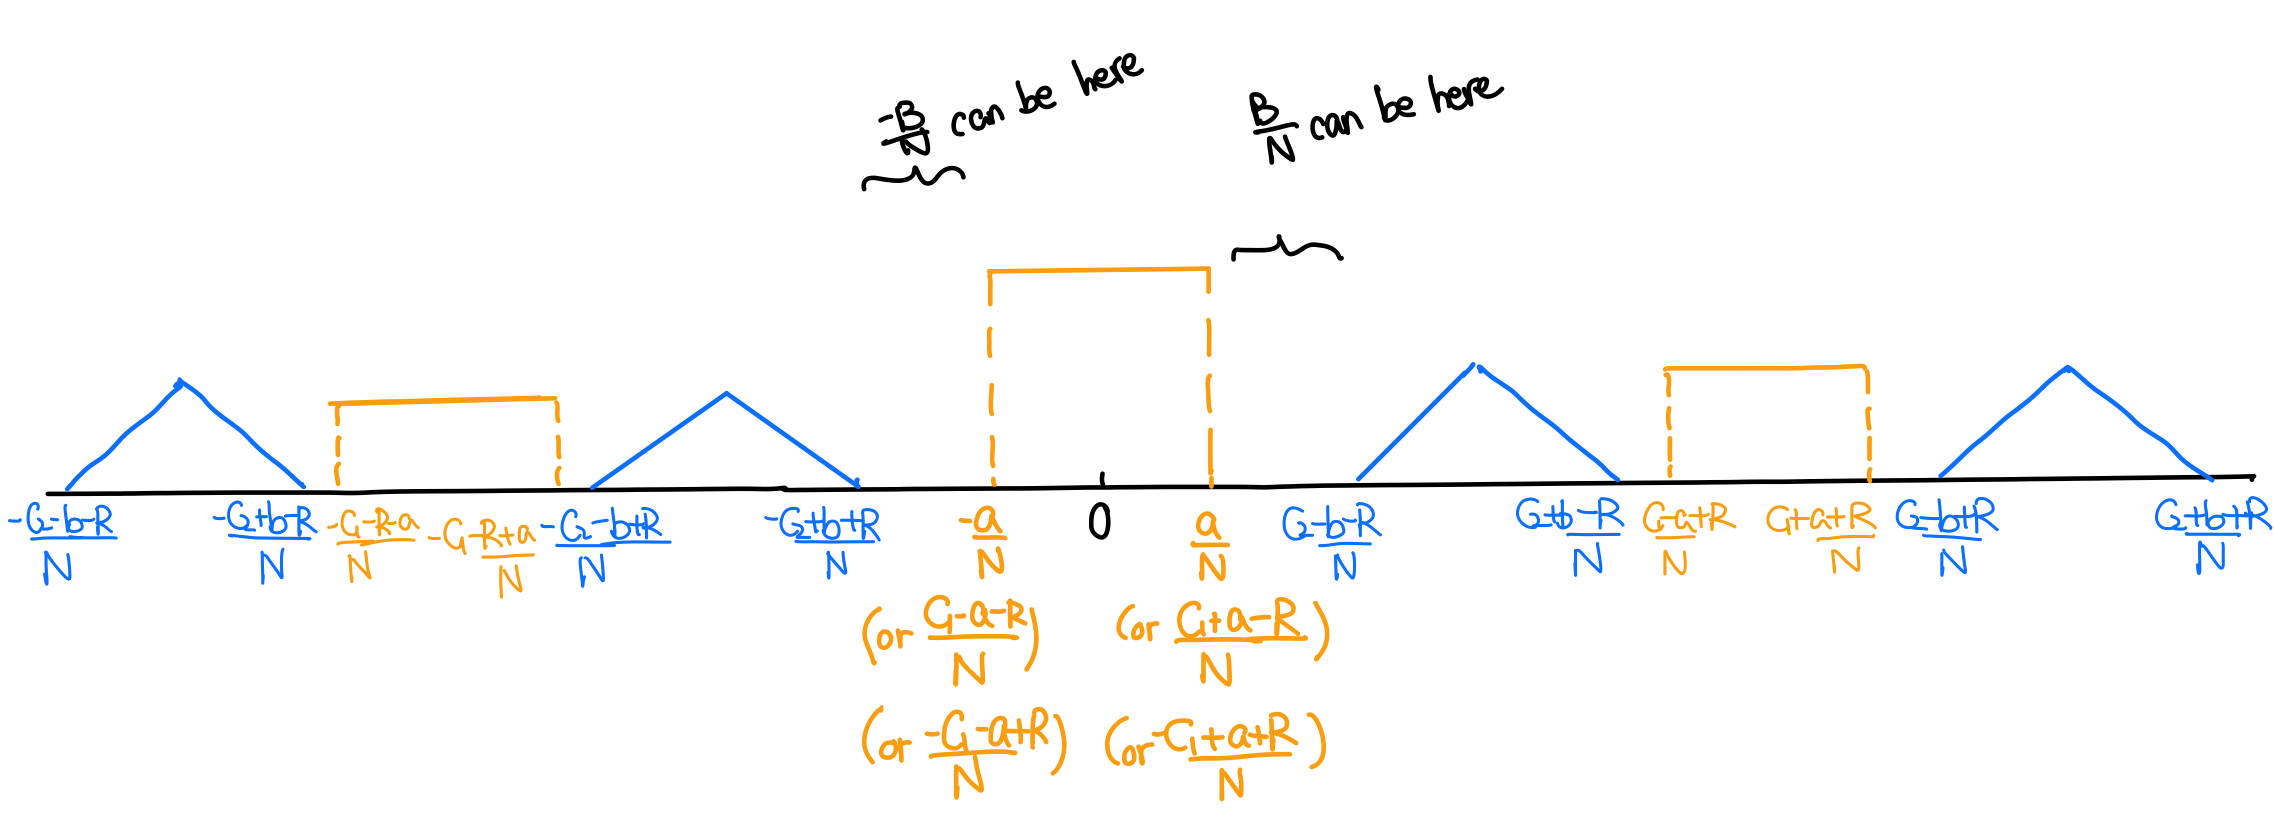

In [117]:
from IPython.display import Image
Image(filename='Problem1b.png')

Therefore, $R=C_1$, and in order to filter out the coefficients that will not be used to recover s, we can have 
$$\begin{equation}
\begin{cases}
B\geq a\\
B<C_2-b-R=C_2-b-C_1
\end{cases}
\end{equation}$$
which shows $B=a$

(c) Similarly, if we have $s=y$,

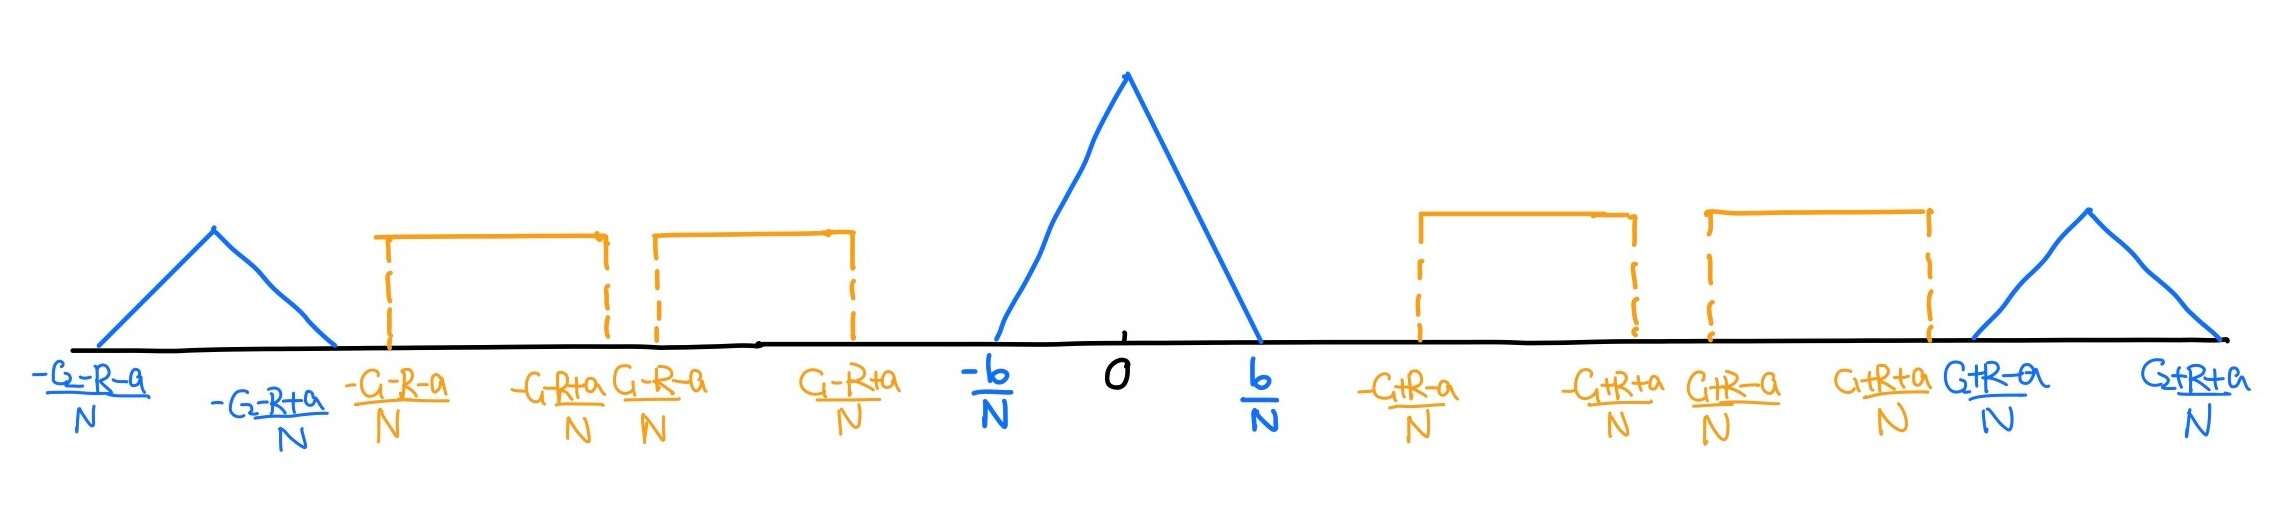

In [118]:
from IPython.display import Image
Image(filename='Problem1c.jpg')

In this case, $R=C_2$ and in order to filter out the coefficients that will not be used to recover s, we can have 
$$\begin{equation}
\begin{cases}
B\geq b\\
B<-C_1+R-a=-C_1+C_2-a
\end{cases}
\end{equation}$$

(d) No. Given that $a<C_1$, it $C_2<2a+b$, then $C_2<C_1+a+b$. If $C_2<2a+b$, it is possible that the shifted DFT coefficients of x overlaps with the shifted coefficients of y.So when we apply the low pass filter, not only the coefficients of interests are kept, but also some other coefficients that we do not want, i.e. they cannot be separated. For example, if we want to recover $s=y$ then it is possible that the below situation happens:

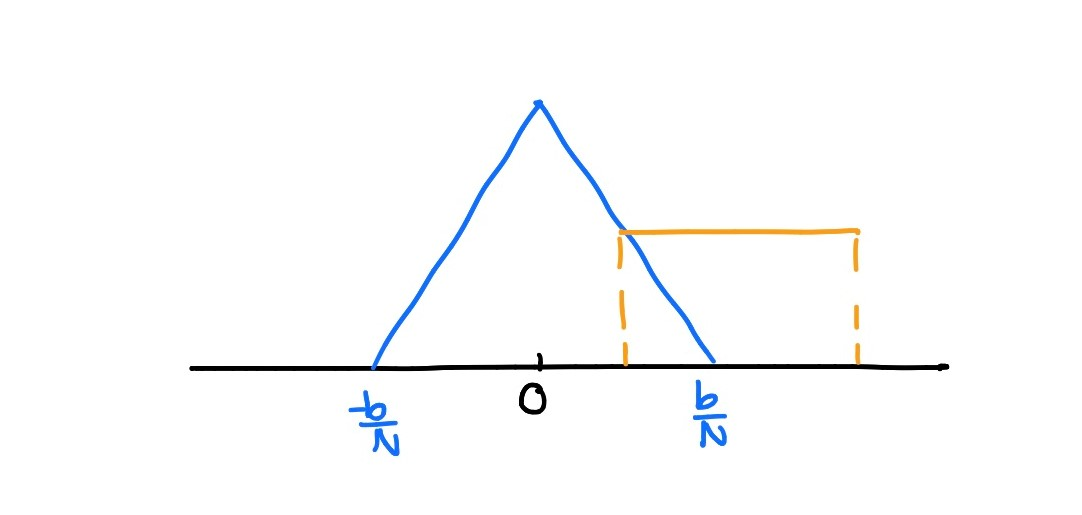

In [119]:
from IPython.display import Image
Image(filename='Problem1d.jpg')

**Problem 2**

(a) $h[j]$ can be expressed as $$\begin{split}h[j]&=\frac{1}{2}(1+cos(\frac{\pi j}{w}))\overrightarrow{\pi}[j]\end{split}$$
where $\overrightarrow{\pi}$ is defined as the rectangular window in notes definition 1.1.

Since $cos(x)=\frac{1}{2}exp(-ix)+\frac{1}{2}exp(ix)$,
$$\begin{split}h[j]
&=\frac{1}{2}(1+cos(\frac{\pi j}{w}))\overrightarrow{\pi}[j]\\
&=\frac{1}{2}(1+\frac{1}{2}exp(\frac{i2\pi Nj}{2wN})+\frac{1}{2}exp(-\frac{i2\pi Nj}{2wN}))\overrightarrow{\pi}[j]\\
&=\frac{1}{2}\overrightarrow{\pi}[j](exp(-\frac{i2\pi 0j}{N}))+\frac{1}{4}exp(\frac{i2\pi Nj}{2wN})\overrightarrow{\pi}[j]+\frac{1}{4}exp(-\frac{i2\pi Nj}{2wN})\overrightarrow{\pi}[j]
\end{split}$$

Therefore, the DFT of $h$ is
$$\begin{split}\hat{h}[k]&=\sum^{N}_{j=1}h[j]exp(-\frac{i2\pi kj}{N})\\
&=\sum^{N}_{j=1}exp(-\frac{i2\pi kj}{N})(\frac{1}{2}\overrightarrow{\pi}[j](exp(-\frac{i2\pi 0j}{N}))+\frac{1}{4}exp(\frac{i2\pi Nj}{2wN})\overrightarrow{\pi}[j]+\frac{1}{4}exp(-\frac{i2\pi Nj}{2wN}))\\
&=\frac{1}{2}\sum^{N}_{j=1}exp(-\frac{i2\pi kj}{N})\overrightarrow{\pi}[j]+\frac{1}{4}\sum^{N}_{j=1}exp(-\frac{i2\pi(k-N/2w)j}{N})\overrightarrow{\pi}[j]+\frac{1}{4}\sum^{N}_{j=1}exp(-\frac{i2\pi(k+N/2w)j}{N})\overrightarrow{\pi}[j]
\end{split}$$

If we define the DFT coefficient of $\hat{\pi}$, we can define
$$\hat{\pi}[k]^{\downarrow N/2w}=\sum^{N}_{j=1}exp(-\frac{i2\pi(k-N/2w)j}{N})\overrightarrow{\pi}[j]$$
Then, the expression can be written as
$$\hat{h}[k]=\frac{1}{2}\hat{\pi}[k]+\frac{1}{4}\hat{\pi}[k]^{\downarrow N/2w}+\frac{1}{4}\hat{\pi}[k]^{\downarrow-N/2w}$$

(b)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# first term
w = 10 # half width
N = 200 # number of samples
kval = np.arange(-N/2+1, N/2, 1, dtype=int)
pi_hat = np.empty(kval.shape, dtype=complex)
for i in range(len(kval)):
    term_k = 0
    for j in range(N):
        if np.abs(j) <= w:
            pi = 1
        else:
            pi = 0
        term_k += np.exp(-1j*2*np.pi*kval[i]*j/N) * pi
    pi_hat[i] = term_k
first = pi_hat*1/2

In [11]:
# second term
w = 10 # half width
N = 200 # number of samples
kval = np.arange(-N/2+1, N/2, 1, dtype=int)
pi_hat = np.empty(kval.shape, dtype=complex)
for i in range(len(kval)):
    term_k = 0
    for j in range(N):
        if np.abs(j) <= w:
            pi = 1
        else:
            pi = 0
        term_k += np.exp(-1j*2*np.pi*(kval[i]+N/(2*w))*j/N) * pi
    pi_hat[i] = term_k
second = pi_hat*1/4

In [5]:
# third term
w = 10 # half width
N = 200 # number of samples
kval = np.arange(-N/2+1, N/2, 1, dtype=int)
pi_hat = np.empty(kval.shape, dtype=complex)
for i in range(len(kval)):
    term_k = 0
    for j in range(N):
        if np.abs(j) <= w:
            pi = 1
        else:
            pi = 0
        term_k += np.exp(-1j*2*np.pi*(kval[i]-N/(2*w))*j/N) * pi
    pi_hat[i] = term_k
third = pi_hat*1/4

Text(0.5, 1.0, 'DFT and Components')

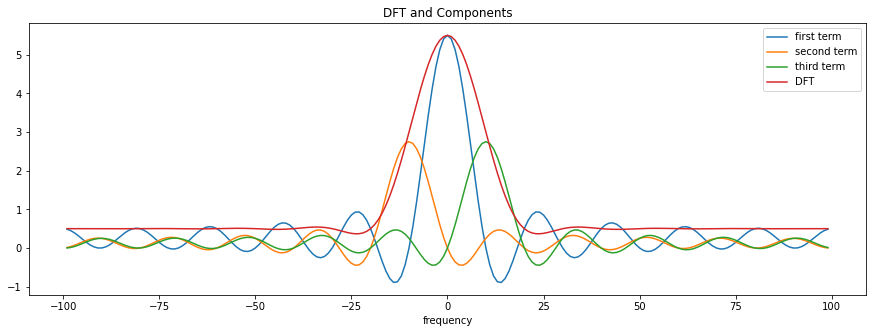

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(-N/2+1, N/2, 1, dtype=int), np.real(first), label='first term')
ax.plot(np.arange(-N/2+1, N/2, 1, dtype=int), np.real(second), label='second term')
ax.plot(np.arange(-N/2+1, N/2, 1, dtype=int), np.real(third), label='third term')
ax.plot(np.arange(-N/2+1, N/2, 1, dtype=int), np.real(first+second+third), label='DFT')
ax.legend()
ax.set_xlabel('frequency')
ax.set_title('DFT and Components')

The DFT of the Hann window can be splited into 3 terms, and the 2 terms scaled by $\frac{1}{4}$ and shifted by $\frac{N}{2w}$ or $-\frac{N}{2w}$ from 0 cancel out the side lobes of the first term outside of the window.

**Problem 3**

(a) The matrix representation of the STFT can be written as
$$\begin{split}\begin{bmatrix}STFT_{[l]}(x)[0,0]\\...\\STFT_{[l]}(x)[l-1,0]\\STFT_{[l]}(x)[0,1]\\...\\STFT_{[l]}(x)[l-1,1]\\STFT_{[l]}(x)[0,2]\\...\\STFT_{[l]}(x)[l-1,2]\\...\end{bmatrix}
&=\begin{bmatrix}F_{[l]}& &0&0&...\\ & &0&0&...\\0&0&F_{[l]}& &...\\0&0& & &...\\...&...&...&...&...\end{bmatrix}\begin{bmatrix}diag(w_{[l]})& &0&...\\ & &0&...\\0&diag(w_{[l]})& &...\\0& & &...\\...&...&...&...\end{bmatrix}x\end{split}$$
where $F_{[l]}$ is an $l\times l$ DFT matrix, 0 represents a $l/2\times l/2$ matrix full of 0s, and $diag(w_{[l]})$ is a diagonal matrix that has the window function as its diagonal.

(Sorry for the ugly representation here. I did not figure out how to resemble the matrix we have in our notes in jupyter notebook.

The first step is applying the inverse DFT. From the previous lecture, the inverse DFT is $x=\frac{1}{N}F^*_{N}\hat{x}$ for the vector x and its Fourier coefficient $\hat{x}$. We multiply both sides of the equation with the inverse DFT and get

$$\begin{split}\frac{1}{l}\begin{bmatrix}F^*_{[l]}& &0&0&...\\ & &0&0&...\\0&0&F^*_{[l]}& &...\\0&0& & &...\\...&...&...&...&...\end{bmatrix}\begin{bmatrix}STFT_{[l]}(x)[0,0]\\...\\STFT_{[l]}(x)[l-1,0]\\STFT_{[l]}(x)[0,1]\\...\\STFT_{[l]}(x)[l-1,1]\\STFT_{[l]}(x)[0,2]\\...\\STFT_{[l]}(x)[l-1,2]\\...\end{bmatrix}
&=\begin{bmatrix}diag(w_{[l]})& &0&...\\ & &0&...\\0&diag(w_{[l]})& &...\\0& & &...\\...&...&...&...\end{bmatrix}x\end{split}$$
where the $F^*{[l]}$ has the same size with the $F_{[l]}$.

Then, the second step is to subsampling. Given that $\alpha_{ov}=0.5$, the length of the vector $x$ will be $N+\frac{0.5l}{\frac{N}{l}-1}$. We can denote each entry in the result of the left-hand-side to be $STFT^*_{[l]}(x)[index 1, index 2]$, and the right-hand-side as $x^*[index]$, so the above equation can be rewritten as
$$\begin{split}\begin{bmatrix}STFT^*_{[l]}(x)[0,0]\\...\\STFT^*_{[l]}(x)[l-1,0]\\STFT^*_{[l]}(x)[0,1]\\...\\STFT^*_{[l]}(x)[l-1,1]\\STFT^*_{[l]}(x)[0,2]\\...\\STFT^*_{[l]}(x)[l-1,2]\\...\end{bmatrix}
&=\begin{bmatrix}x^*[0]\\...\\x^*[l-1]\\x^*[l+\frac{l}{2}]\\...\\x^*[2l-1+\frac{l}{2}]\\x^*[2l+\frac{l}{2}]\\...\end{bmatrix}\end{split}$$

In the above expression, we have $STFT^*_{[l]}(x)[i,j]=x^*[i+j(1-\alpha_{ov})l]$. We can subsample the left-hand-side $STFT^*$ to reconstruct x. In this case, we can sample the first $\frac{l}{2}$ entries, and continue sampling by every other $\frac{l}{2}$, i.e. $x[j]=STFT^*_{[l]}(x)[(j)mod \frac{l}{2}, j//\frac{l}{2}]$

(b) The disadvantage of the rectangular window is that discontinuity happens on the boundaries of each sampling section. Then, we may have artifacts that are caused by the abrupt break of the window and not related to the actual signal in our reconstruction process.

**Problem 4**

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import matplotlib.colors as colors

In [136]:
filepath = 'waves_yesno/'
fs, data= wavfile.read(filepath + '0_0_0_0_1_1_1_1.wav')

In [137]:
ini = 7000-1
end = 10500+1

# ini = 26000
# end = 30000

data_zoom = data[ini:end]

tick_size = 14
label_size = 16

t_plot_1 =0.5
t_plot_2 = 6.25
t_inds = np.arange(len(data))/fs

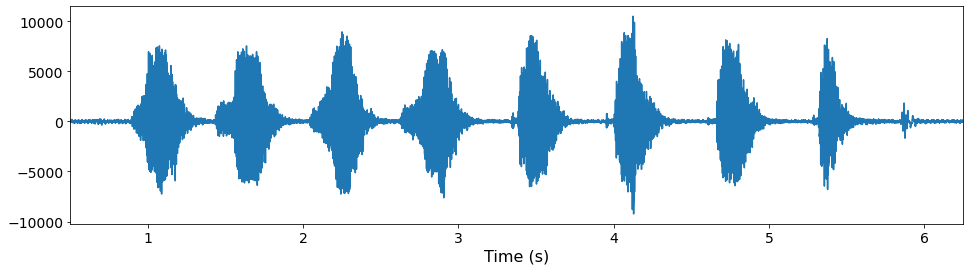

In [138]:
plt.figure(figsize=(16,4))
plt.plot(t_inds,data)
plt.xlabel('Time (s)',fontsize=label_size)
plt.xlim([t_plot_1,t_plot_2])
plt.tick_params(labelsize=tick_size)

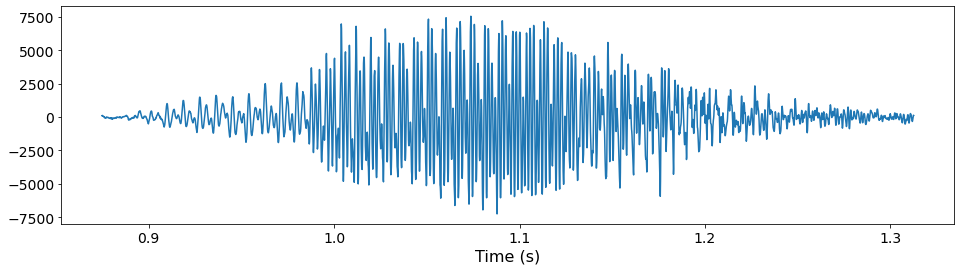

In [139]:
plt.figure(figsize=(16,4))
plt.plot(t_inds[ini:end],data_zoom)
plt.xlabel('Time (s)',fontsize=label_size)
plt.tick_params(labelsize=tick_size)

(-4000.0, 4000.0)

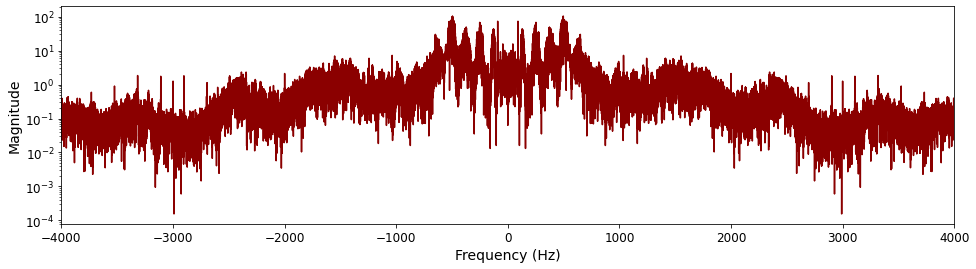

In [140]:
ft = np.fft.fft(data)
n = len(data)
plt.figure(figsize=(16,4))
freq_samples = np.linspace(-fs/2,fs/2,n)# np.arange(-fs/2,fs/n,fs/2)
plt.plot(freq_samples,np.abs(np.fft.fftshift(ft))/n,color='darkred')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.ylabel('Magnitude',fontsize=14)
plt.xlabel('Frequency (Hz)',fontsize=14)
plt.xlim((-4000,4000))

(a)

In [159]:
hann_size = [100, 500, 1000, 3000, 5000, 20000]
f = []
t = []
stft_coeffs = []
for s in hann_size:
    temp1, temp2, stft = signal.stft(data, fs, nperseg=s, return_onesided=True, window='hann', nfft=len(ft))
    f.append(temp1)
    t.append(temp2)
    stft_coeffs.append(stft)

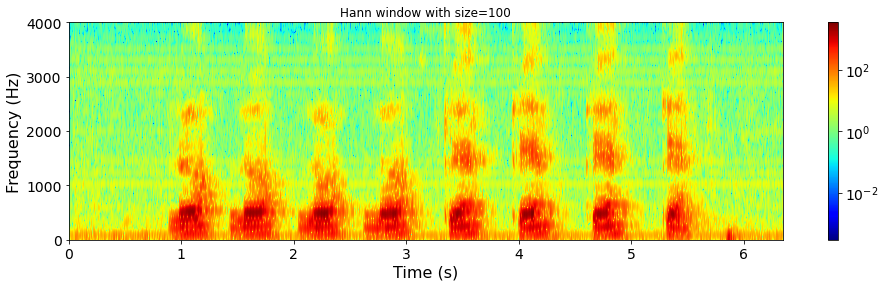

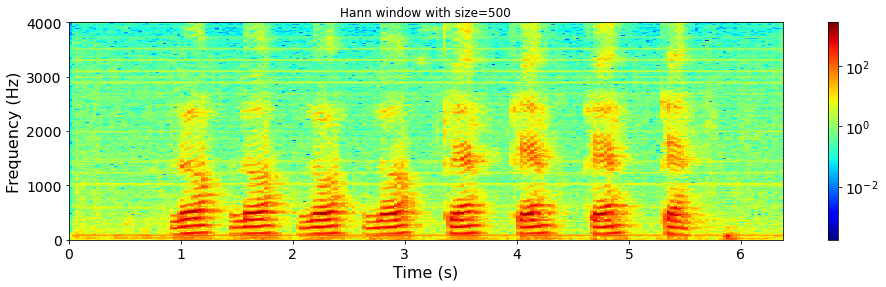

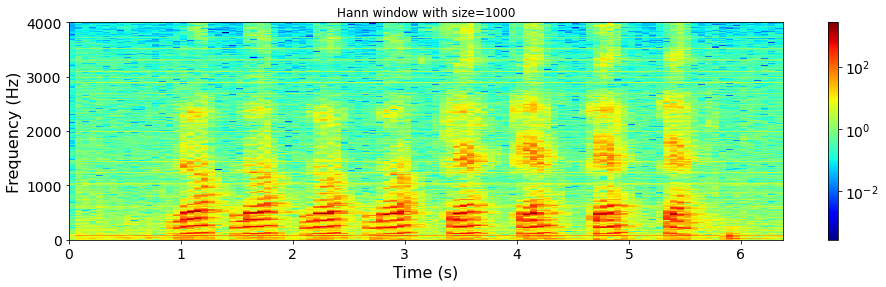

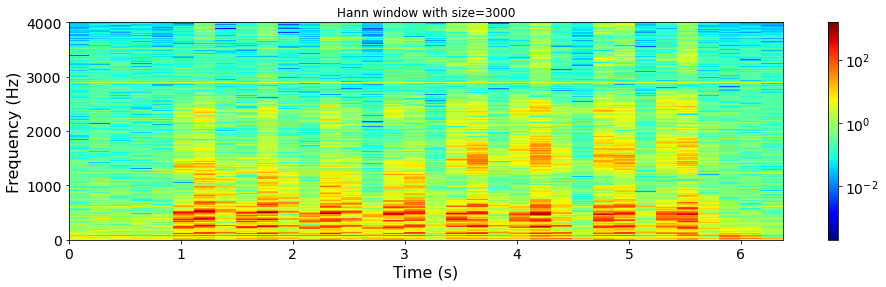

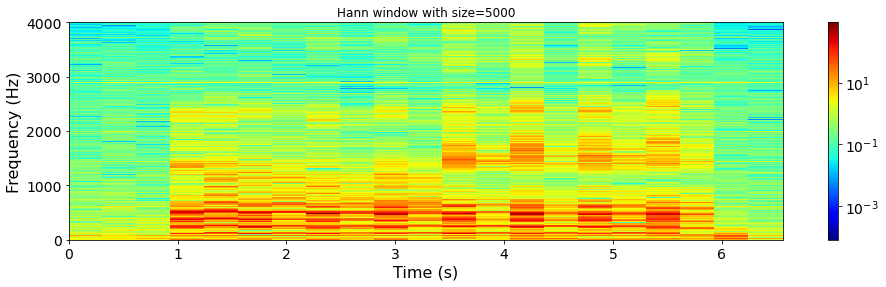

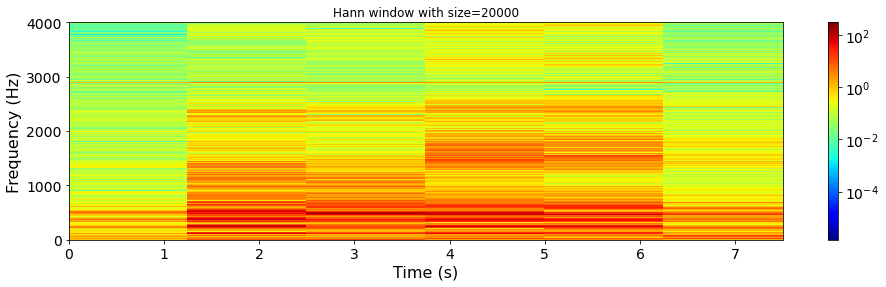

In [166]:
for i in range(len(f)):
    plt.figure(figsize=(16,4))
    mag_stft_coeffs = np.abs(stft_coeffs[i])
    plt.pcolormesh(t[i], f[i], np.abs(mag_stft_coeffs),norm=colors.LogNorm(vmin=mag_stft_coeffs.min(), vmax=mag_stft_coeffs.max()),cmap='jet') # vmin=0, vmax=amp
    # plt.yscale('log')
    cb = plt.colorbar()
    # plt.show()
    plt.tick_params(labelsize=tick_size)
    cb.ax.tick_params(labelsize=tick_size)
    plt.ylabel('Frequency (Hz)',fontsize=label_size)
    plt.xlabel('Time (s)',fontsize=label_size)
    plt.title('Hann window with size={}'.format(hann_size[i]))

(b)

In [171]:
rec_size = [500, 1000, 3000, 5000, 20000]
f = []
t = []
stft_coeffs = []
for s in rec_size:
    temp1, temp2, stft = signal.stft(data, fs, nperseg=s, return_onesided=True, window='boxcar', nfft=len(ft))
    f.append(temp1)
    t.append(temp2)
    stft_coeffs.append(stft)

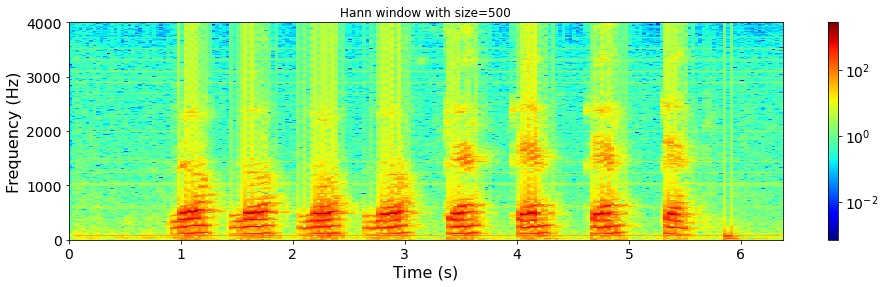

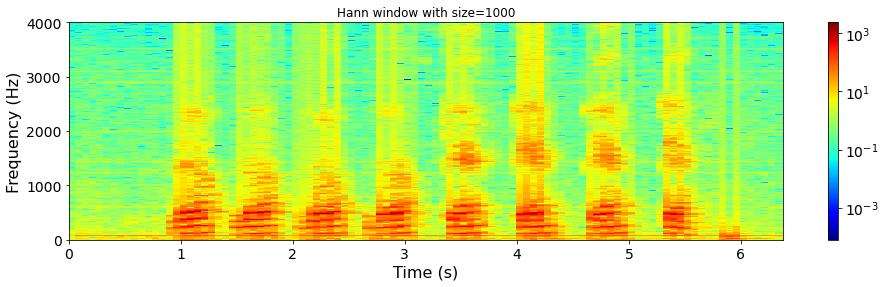

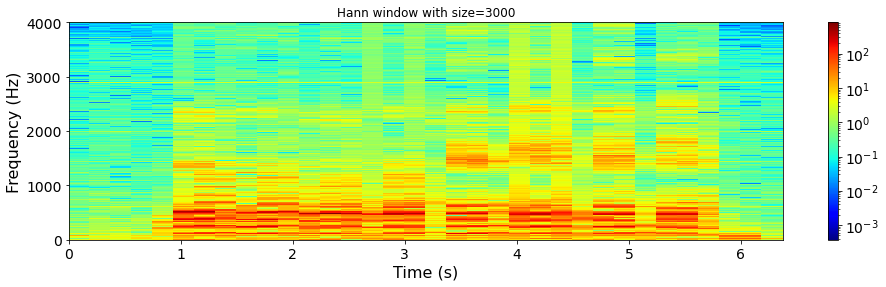

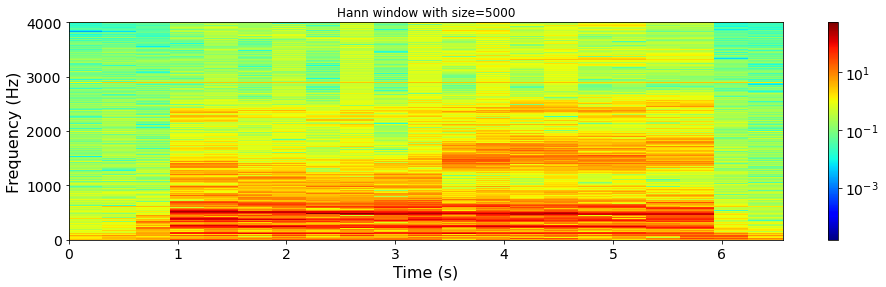

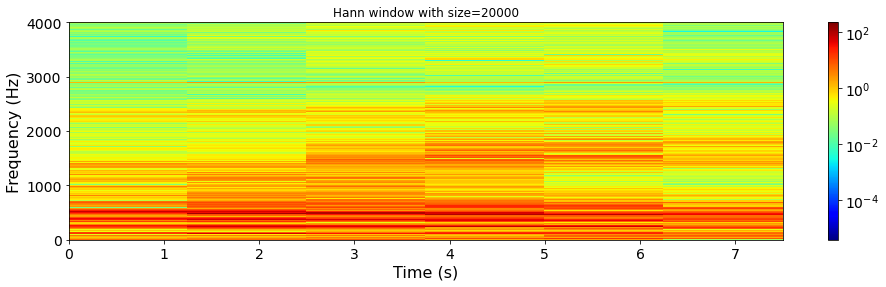

In [172]:
for i in range(len(f)):
    plt.figure(figsize=(16,4))
    mag_stft_coeffs = np.abs(stft_coeffs[i])
    plt.pcolormesh(t[i], f[i], np.abs(mag_stft_coeffs),norm=colors.LogNorm(vmin=mag_stft_coeffs.min(), vmax=mag_stft_coeffs.max()),cmap='jet') # vmin=0, vmax=amp
    # plt.yscale('log')
    cb = plt.colorbar()
    # plt.show()
    plt.tick_params(labelsize=tick_size)
    cb.ax.tick_params(labelsize=tick_size)
    plt.ylabel('Frequency (Hz)',fontsize=label_size)
    plt.xlabel('Time (s)',fontsize=label_size)
    plt.title('Hann window with size={}'.format(rec_size[i]))

(c) In both Hann window and the rectangular window, as the window size increases, longer horizontal "strips" appear and the patterns seems to be constructed by more paralleled horizontal line segments of different colors. Meanwhile, the parts of very dark blue and red both disappear, and more "uniform" (or less various) colors appear on the heatmaps as window size increases. This can be caused by that as the window size becomes larger, the STFT coefficients capture the average contiditions/values of the frequency domain in longer time segments. Then the patterns becomes harder to be separated or identified.

(d) With the same window size, the Hann window generally has more color variation and clearer color patterns at each time, while the rectangular window has more "yellow" and shows color segments with boundaries "blurred" by yellow on the map. This shows the Hann windows gives much variation in the magnitudes at different frequencies. This may relates to the discontinuity of the rectangular window and the artifacts it introduces.